* To check the plume thickness with and without the Coriolis force.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools,geo_tools)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2., rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]

In [3]:
## load grid_T model results
octall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
mayall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
janall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

octnof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014nof/oct2014nof_T.nc')
maynof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015nof/may2015nof_T.nc')
jannof_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016nof/jan2016nof_T.nc')

In [4]:
## load grid_U model results for all _U
octall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_U.nc')
mayall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_U.nc')
janall_U = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_U.nc')

(48.9, 49.5)

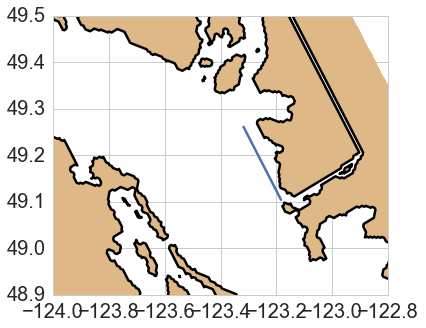

In [5]:
fig, ax =plt.subplots(1,1,figsize = (6,5))
ax.plot(X[419:460,310],Y[419:460,310],'-') ## transect location
                                            ## 419-380:460-380, 310-240
viz_tools.plot_land_mask(ax,grid6,coords='map',color='burlywood')
viz_tools.plot_coastline(ax, grid6, coords = 'map')
ax.set_xlim([-124.,-122.8])
ax.set_ylim([48.9,49.5])

In [6]:
U = {}
for month,gridU in zip(['jan','oct','may'],[janall_U,octall_U,mayall_U]):
    U[month] = gridU.variables['vozocrtx']

In [7]:
PEC = {} ## short form of peak ebb currents!
PET = {}## short form of peak ebb times!
for month in ['jan','oct','may']:
    PEC[month] = [];
    PET[month] = [];
    
for month in ['jan','oct','may']:
    for t in np.arange(0,len(U[month]),24):
        pec = np.nanmin(U[month][t:t+24,0,38,72])
        PEC[month].append(pec)
        pet = np.nanargmin(U[month][t:t+24,0,38,72])+t
        PET[month].append(pet)

In [8]:
def Plot_Vertical_Transect(all_T, nof_T, t, S_thre,strings,levels):
    """
    To plot the salinity of the vertical transect
    """
    fig, axs = plt.subplots(1,2,figsize = (15,6))
    for ax, grid_T,string in zip(axs, [all_T,nof_T], strings):
        salinity = np.ma.masked_values(grid_T.variables['vosaline'][t,:,39:80,70],0)
        depth = grid_T.variables['deptht']
        lon = grid_T.variables['nav_lon'][39:80,70]
        MESH = ax.contourf(lon[:],depth[:],salinity[:],levels,cmap = 'plasma_r')
        CS = ax.contour(lon[:],depth[:],salinity[:], levels = [S_thre], colors='cyan',linewidths=(2.5))
        plt.clabel(CS, fmt='%2.1f',inline=1,inline_spacing=-2,colors='k',fontsize = 14)
        cbar= fig.colorbar(MESH, ax = ax)
        cbar.set_label('Practical Salinity')
        ax.set_title(string)
        ax.set_ylim([40,0])
    plt.show()

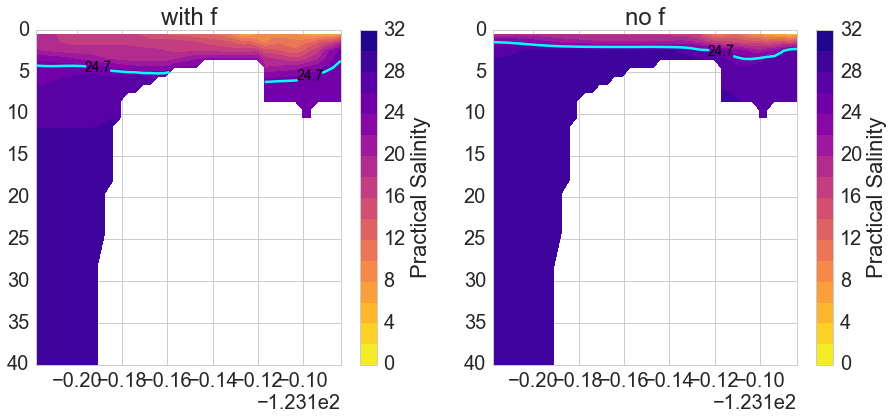

In [9]:
## Jan
strings = ['with f', 'no f']
t = 679
S_thre = 24.7
levels = np.arange(0,33,2)
Plot_Vertical_Transect(janall_T,jannof_T,t,S_thre,strings, levels)

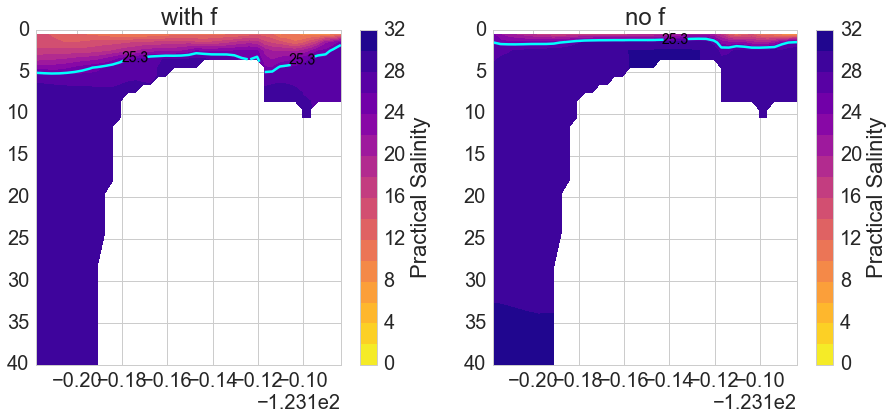

In [10]:
## Oct
t = 432
S_thre = 25.3
Plot_Vertical_Transect(octall_T,octnof_T,t,S_thre,strings, levels)

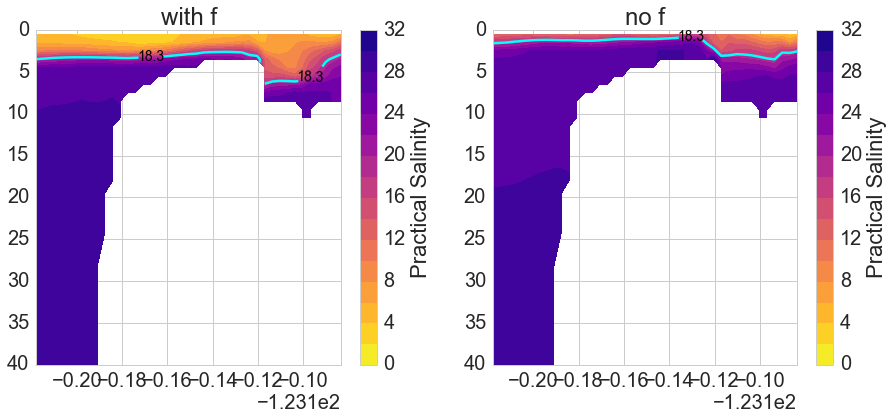

In [11]:
## May
t = 350
S_thre = 18.3
Plot_Vertical_Transect(mayall_T,maynof_T,t,S_thre,strings, levels)